In [33]:
# Import libraries

import timeit
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.ndimage as nd
import cv2


In [34]:
start_time = timeit.default_timer()

In [35]:
def where_is_circle(x0, y0, r):
    
    # Initialize x and y coordinate arrays, which keep track of the x, y coordinate of the image
    x_range = np.ones(img.shape)
    x_range = x_range * np.arange(0, img.shape[1])
    y_range = np.ones(img.shape)

    y_dummy = np.arange(0, img.shape[0]).T
    y_range = np.ones(img.shape) * y_dummy[:, np.newaxis]
    
    # Mask every pixel that is within the radius of the circle and its center
    where_circle = ((x_range - x0)**2 + (y_range - y0)**2) < r**2
    where_circle = where_circle.astype(int)
    
    # Return mask
    return where_circle

In [36]:
# Load image
img = cv2.imread('bacterial_colonies.jpg',0)
#plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')

# Compute Hough transform to find circles
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1.5,100,param1=300,param2=100,minRadius=100,maxRadius=200)
circles = np.uint16(np.around(circles))


Text(0.5, 1.0, 'Identified bacterial plates')

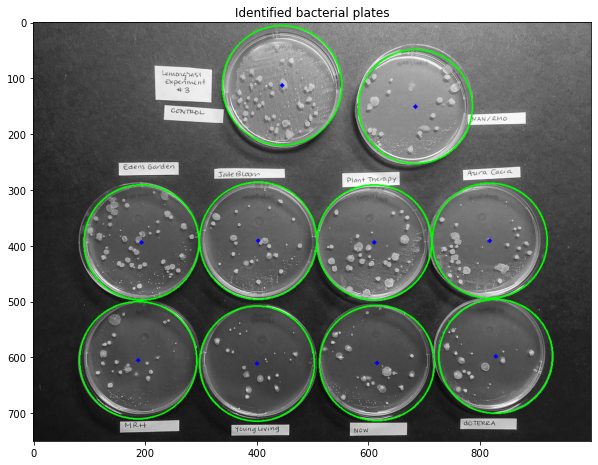

In [37]:
# Plot the found circles and their center coordinates in the original image
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
plt.figure(figsize=(10,10))
plt.imshow(cimg)
plt.title("Identified bacterial plates")

In [38]:
# Mask generation
masks = np.zeros(img.shape) # initialize mask image

for i, circle in enumerate(circles[0]): # for every circle coordinate, make a separate mask
    
    # Retrieve center coordinates and radius of each circle
    x0, y0, r = circle[0], circle[1], circle[2] 
    circle_mask = where_is_circle(x0, y0, r) # retrieve mask
    masks = masks + circle_mask # accumulate masks in one binary image
    
    # Crop the image region within the mask
    plate = circle_mask * img 
    plate_cropped = plate[y0-r:y0+r, x0-r:x0+r] 
    plt.imsave('Plate'+str(i)+'.png',plate_cropped) # save each plate image, cropped to include minimal background


Code run in 1.49 seconds


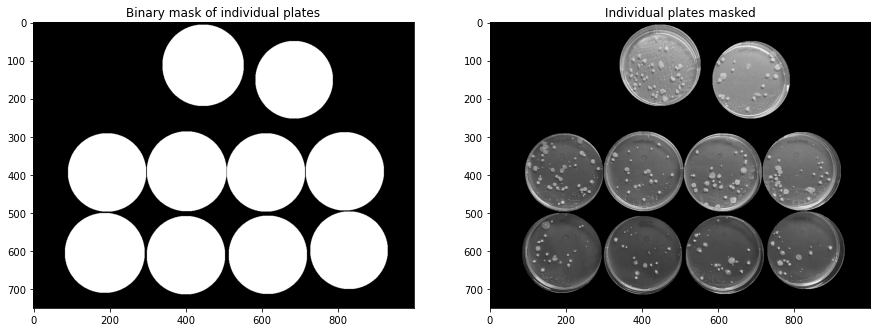

In [39]:
# Plot some images 
fig, axes = plt.subplots(1, 2, figsize=(15,15))
axes[0].imshow(masks, cmap='gray')
axes[0].set_title("Binary mask of individual plates") # plot the binary mask

axes[1].imshow(masks*img, cmap='gray') # plot the image within the mask
axes[1].set_title("Individual plates masked")

elapsed = timeit.default_timer() - start_time
print("Code run in", "%.2f" % elapsed,"seconds")

Bacterial colony area in Plate 0 = 29.816326530612248
Bacterial colony area in Plate 1 = 48.656800829484396
Bacterial colony area in Plate 2 = 6.211707041191442
Bacterial colony area in Plate 3 = 47.13832199546486
Bacterial colony area in Plate 4 = 0.524063236963927
Bacterial colony area in Plate 5 = 10.465171081157507
Bacterial colony area in Plate 6 = 32.87303233103968
Bacterial colony area in Plate 7 = 52.064109957708574
Bacterial colony area in Plate 8 = 51.42096333301913
Bacterial colony area in Plate 9 = 0.33640907343329485


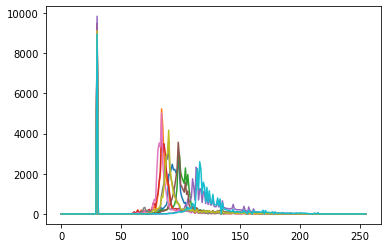

In [40]:
# Calculate histogram for your masked image and calculate the area filled with bacteria per petri dish 
for i in range(0,10,1):  
    img = cv2.imread('Plate'+ str(i) + '.png',0)
    hist,bins = np.histogram(img.ravel(),256,[0,256])
    plt.plot(hist)
    len_bins= len(bins)-1
    #here is the totaly area under the histogram 
    Total_Area= sum(hist[0:len_bins])/sum(hist)
    #area of bacterial colony normalized over total area
    bacteria_area= sum(hist[84:95])/sum(hist)
    print('Bacterial colony area in Plate',str(i), '=', bacteria_area*100)